In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [39]:
df = pd.read_csv('Datasets/cleaned_rbi_data(1).csv')
df.head()

,State / Union Teritory,1995,1997,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Andhra Pradesh,61.8,62.4,64.6,65.0,65.3,65.5,65.7,65.6,65.8,66.3,67.0,67.9,68.5,69.0,69.6,69.7,70.0,70.3
1,Assam,55.7,56.9,58.8,59.2,60.0,60.6,61.0,61.6,61.9,62.2,62.7,63.3,63.9,64.7,65.5,66.2,66.9,67.5
2,Bihar,59.3,59.4,64.1,64.2,64.4,64.4,64.4,65.1,65.8,66.3,67.2,67.7,68.1,68.4,68.7,68.9,69.1,69.2
3,Gujarat,61.0,61.9,65.6,65.7,65.8,66.1,66.4,66.4,66.8,67.3,67.7,68.2,68.7,69.1,69.5,69.7,69.9,70.2
4,Haryana,63.4,64.2,66.1,66.5,67.0,67.1,67.1,67.1,67.0,67.3,67.6,68.2,68.6,69.1,69.4,69.7,69.8,69.9


In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


all_years = list(range(1995, 2021))


data_long = pd.melt(df, id_vars=['State / Union Teritory'], var_name='Year', value_name='Value')
data_long['Year'] = data_long['Year'].astype(int)


missing_years = {state: [year for year in all_years if year not in data_long[data_long['State / Union Teritory'] == state]['Year'].tolist()] for state in df['State / Union Teritory']}


def impute_missing_years(state, existing_data):
    existing_data = existing_data.dropna()
    if not existing_data.empty:
        model = SVR()
        X = existing_data[['Year']]  # Predictor
        y = existing_data['Value']  # Target
        model.fit(X, y)
        
        # Predict missing years for the state
        missing_years_predict = missing_years[state]
        if missing_years_predict:
            missing_values = model.predict(np.array(missing_years_predict).reshape(-1, 1))
            return pd.DataFrame({
                'State / Union Teritory': state,
                'Year': missing_years_predict,
                'Value': missing_values
            })
    return pd.DataFrame()

# Apply the function for each state and concatenate results
imputed_data = pd.concat([impute_missing_years(state, data_long[data_long['State / Union Teritory'] == state]) for state in df['State / Union Teritory']])
 
# Merge the original and imputed data
full_data = pd.concat([data_long, imputed_data]).sort_values(by=['State / Union Teritory', 'Year']).reset_index(drop=True)

full_data[(full_data['Year'] == 2020) | (full_data['Year'] == 1996)]  # Display imputed data for 1996 and 2020


c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
c:\Us

,State / Union Teritory,Year,Value
1,Andhra Pradesh,1996,64.221118
25,Andhra Pradesh,2020,69.330821
27,Assam,1996,59.319156
51,Assam,2020,65.048314
53,Bihar,1996,63.716200
77,Bihar,2020,68.339030
79,Gujarat,1996,64.834260
103,Gujarat,2020,69.409413
105,Haryana,1996,64.972141
129,Haryana,2020,69.523147


# PLOTS

In [41]:
data = df.set_index('State / Union Teritory')
years = data.columns.astype(int)  

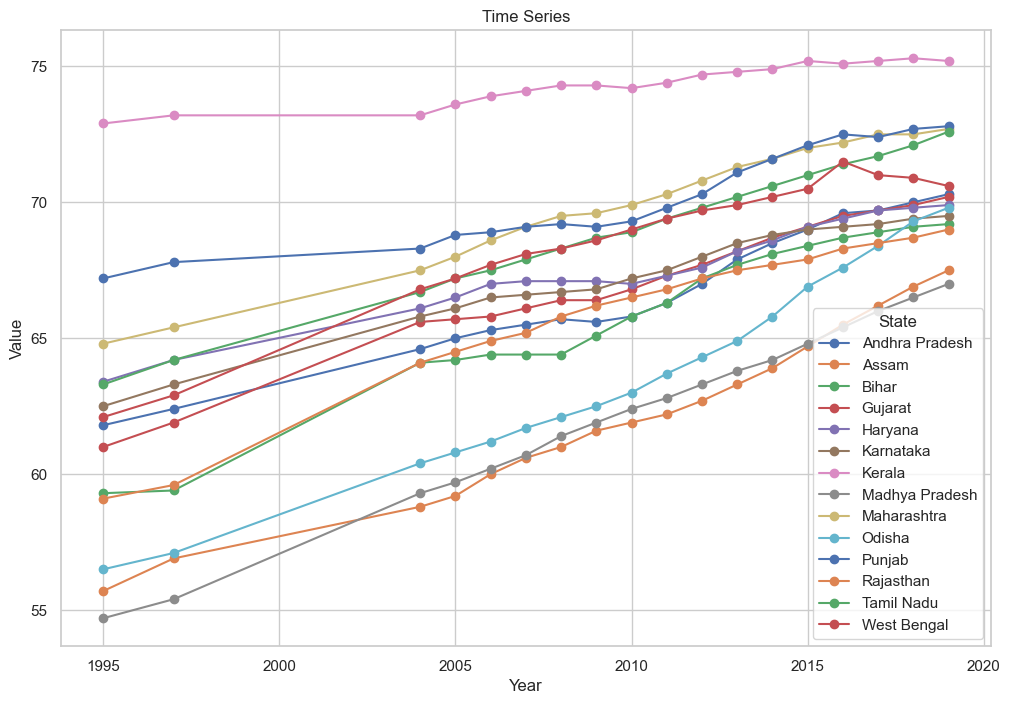

In [42]:
plt.figure(figsize=(12, 8))
for state in data.index:
    plt.plot(years, data.loc[state], marker='o', label=state)
plt.title('Time Series')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='State')
plt.grid(True)
plt.show()


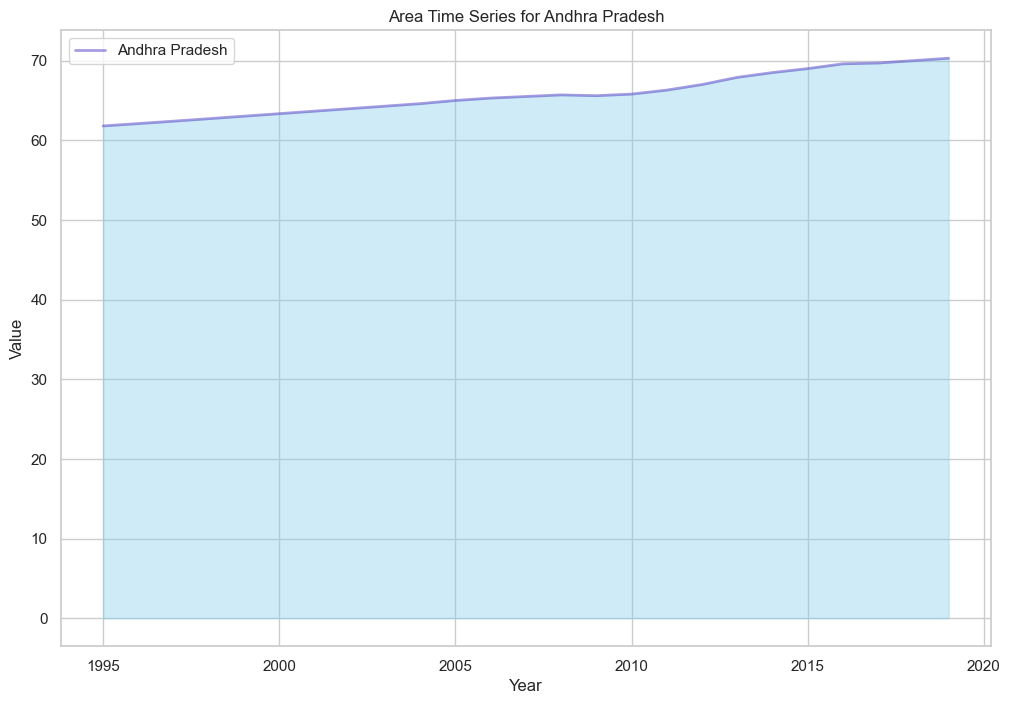

In [43]:
plt.figure(figsize=(12, 8))
plt.fill_between(years, data.loc['Andhra Pradesh'], color="skyblue", alpha=0.4)
plt.plot(years, data.loc['Andhra Pradesh'], color="Slateblue", alpha=0.6, linewidth=2, label='Andhra Pradesh')
plt.title('Area Time Series for Andhra Pradesh')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


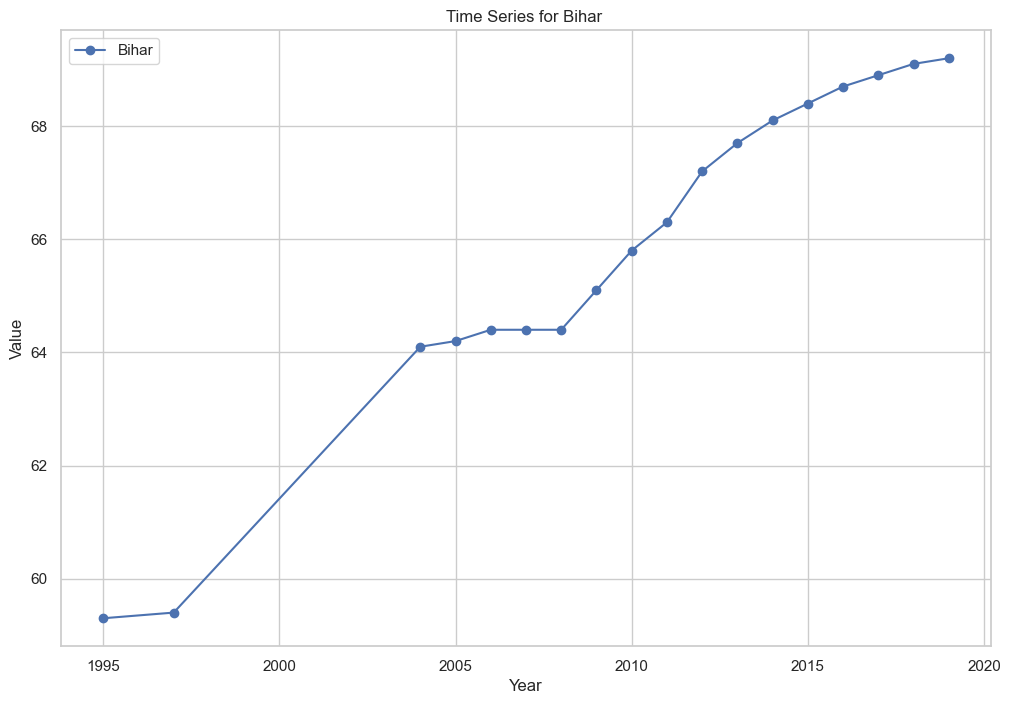

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(years, data.loc['Bihar'], marker='o', label='Bihar')
plt.title('Time Series for Bihar ')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


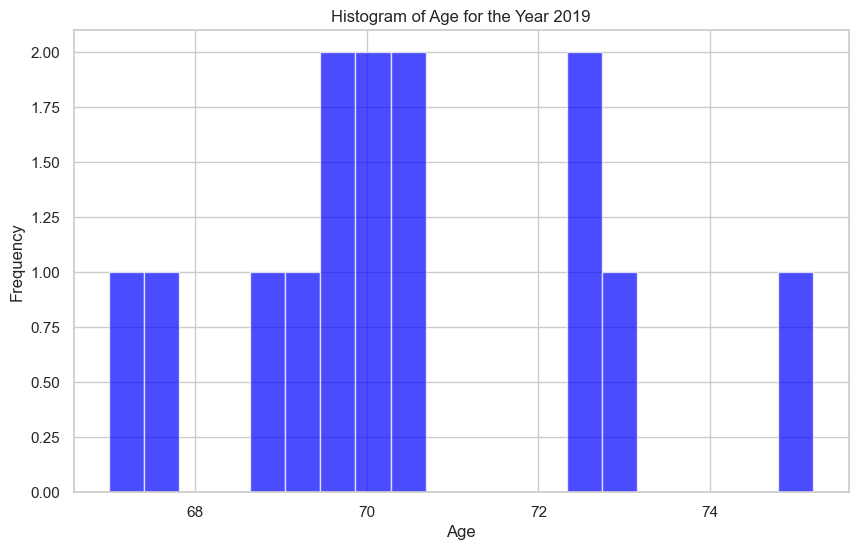

In [45]:
import matplotlib.pyplot as plt
year = '2019'  
plt.figure(figsize=(10, 6))
plt.hist(data[year].dropna(), bins=20, alpha=0.7, color='blue')
plt.title(f'Histogram of Age for the Year {year}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


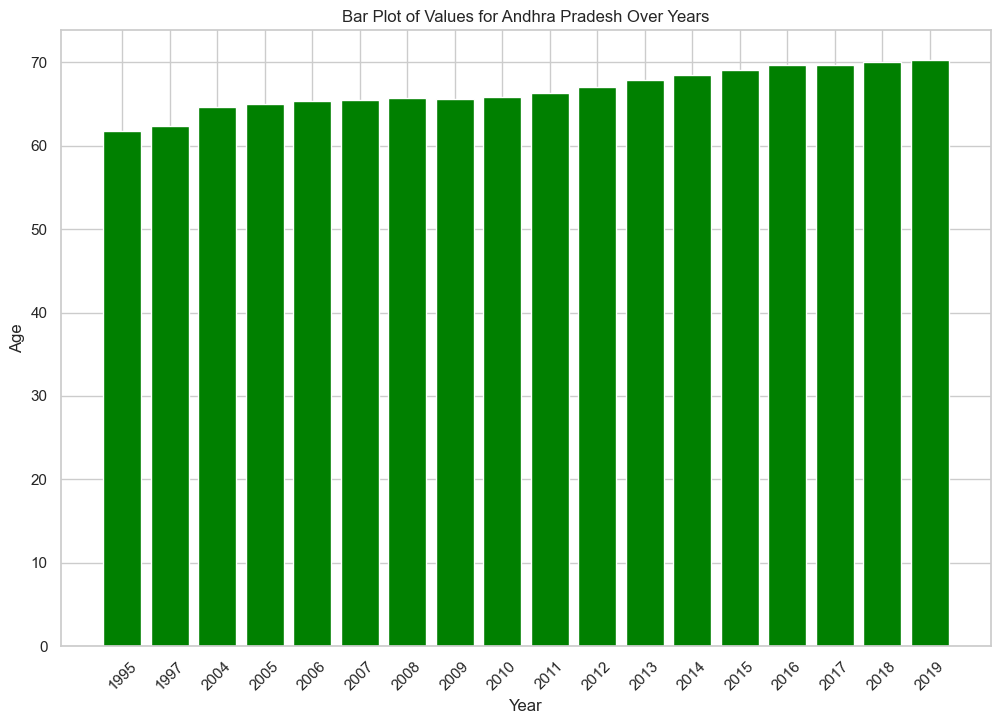

In [46]:
state = 'Andhra Pradesh'
state_data = data.loc[state]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(state_data.index, state_data.values, color='green')
plt.title(f'Bar Plot of Values for {state} Over Years')
plt.xlabel('Year')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.grid(True)
plt.show()

In [49]:
df2 = pd.read_csv('Datasets/cleaned_pm25_data.csv')
df2.head()

,dist_name,state_name,ST_CEN_CD,DT_CEN_CD,censuscode,Y1998,Y1999,Y2000,Y2001,Y2002,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,state_name_full
0,anantnag,JK,1,14,14,19.723529,20.527451,24.611765,27.478431,28.156863,...,24.280392,23.903922,26.509804,24.086275,33.415686,26.284314,27.384314,23.488235,23.535294,Jammu and Kashmir
1,badgam,JK,1,2,2,30.225000,30.004167,34.350000,38.550000,38.091667,...,33.866667,34.058333,36.720833,34.841667,50.058333,37.483333,37.158333,35.270833,34.412500,Jammu and Kashmir
2,bandipore,JK,1,9,9,19.348837,19.006977,21.974419,25.411628,25.346512,...,22.397674,23.209302,24.648837,21.713953,32.004651,24.644186,25.293023,22.902326,22.051163,Jammu and Kashmir
3,baramula,JK,1,8,8,30.236364,28.969697,32.918182,37.745455,36.321212,...,32.069697,33.169697,34.600000,32.918182,47.672727,36.442424,35.763636,34.387879,33.696970,Jammu and Kashmir
4,doda,JK,1,16,16,23.563889,24.444444,28.419444,30.808333,31.961111,...,28.138889,27.466667,29.391667,26.711111,34.822222,31.094444,32.316667,26.011111,26.750000,Jammu and Kashmir


In [50]:
year_columns = df2.columns[5:-1]  # Update this slice as necessary based on your actual data structure
for col in year_columns:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

In [51]:
# Aggregating data by state and calculating the mean for each year
state_yearly_avg = df2.groupby('state_name_full')[year_columns].mean()


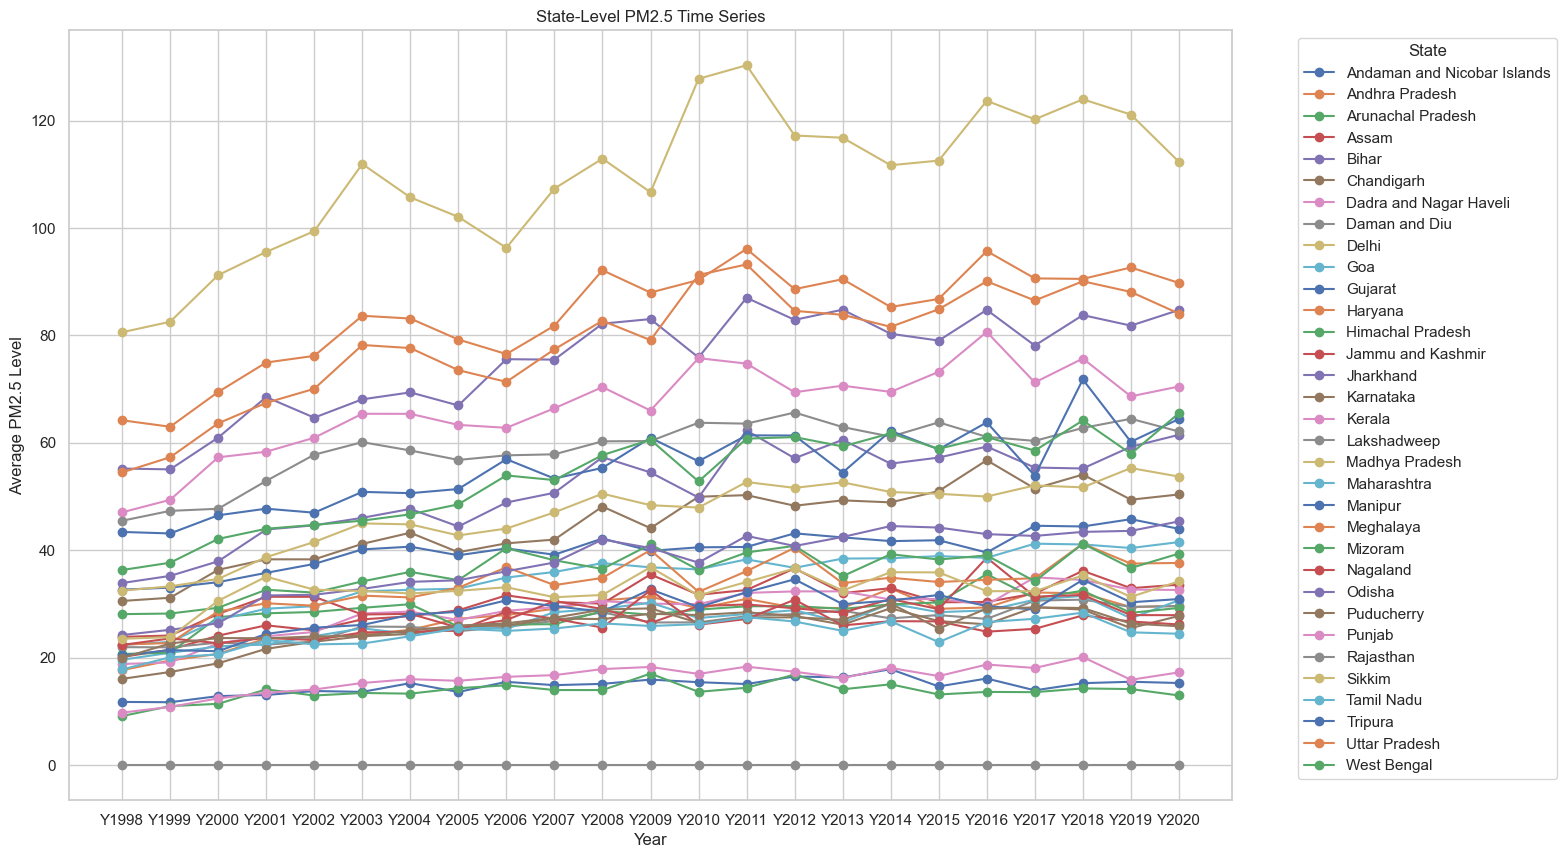

In [52]:
plt.figure(figsize=(15, 10))
for state in state_yearly_avg.index:
    plt.plot(year_columns, state_yearly_avg.loc[state], marker='o', label=state)

plt.title('State-Level PM2.5 Time Series')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

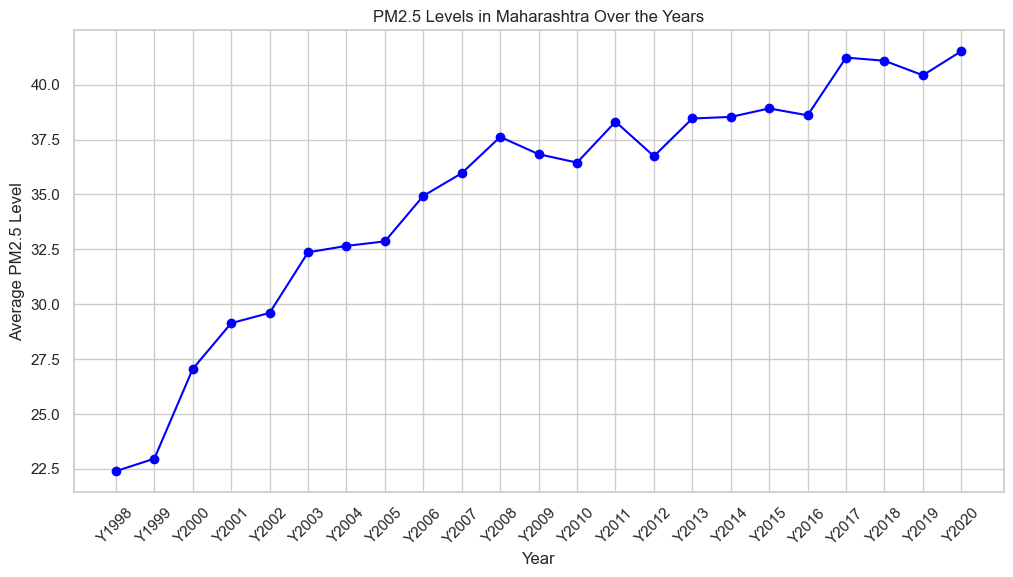

In [53]:
year_columns = df2.columns[5:-1]  # Adjust the slice if necessary
df2[year_columns] = df2[year_columns].apply(pd.to_numeric, errors='coerce')

# Filter data for Maharashtra
maharashtra_data = df2[df2['state_name_full'] == 'Maharashtra']

# Calculate the mean PM2.5 levels across all districts for each year
maharashtra_yearly_avg = maharashtra_data[year_columns].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(maharashtra_yearly_avg.index, maharashtra_yearly_avg, marker='o', linestyle='-', color='blue')
plt.title('PM2.5 Levels in Maharashtra Over the Years')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [55]:
# Load the new uploaded data from the CSV file
df_new_data = pd.read_csv('Datasets/Filtered_NSDP_Data.csv')
df_new_data.head()


,State Name,Geometry,1997,2001,2006,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Arunachal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,...","₹ 10,816","₹ 15,260","₹ 28,171","₹ 60,961","₹ 73,068","₹ 81,353","₹ 91,809","₹ 1,10,929","₹ 1,12,046","₹ 1,17,344","₹ 1,30,197","₹ 1,39,588"
1,Assam,MULTIPOLYGON (((89.74322932956994 26.303620341...,"₹ 7,394","₹ 12,803","₹ 18,396","₹ 33,087","₹ 41,142","₹ 44,599","₹ 49,734","₹ 52,895","₹ 60,817","₹ 66,330","₹ 74,184","₹ 82,078"
2,Bihar,MULTIPOLYGON (((84.50719832504274 24.263231032...,"₹ 4,001","₹ 6,415","₹ 8,223","₹ 19,111","₹ 21,750","₹ 24,487","₹ 26,948","₹ 28,671","₹ 30,404","₹ 34,156","₹ 38,631","₹ 43,822"
3,Chhattisgarh,"POLYGON ((83.33531747931829 24.09885072448139,...","₹ 8,353","₹ 10,744","₹ 20,117","₹ 41,165","₹ 55,177","₹ 60,849","₹ 69,880","₹ 72,936","₹ 73,590","₹ 81,808","₹ 89,813","₹ 96,887"
4,Goa,MULTIPOLYGON (((74.11917887850251 14.753440750...,"₹ 26,418","₹ 43,735","₹ 84,721","₹ 1,68,024","₹ 2,59,444","₹ 2,34,354","₹ 2,15,776","₹ 2,89,185","₹ 3,34,575","₹ 3,82,140","₹ 4,22,155","₹ 4,58,304"


In [61]:

def clean_and_convert_currency(value):
    # Remove the Rupee sign and commas, then convert to integer
    if isinstance(value, str):
        return int(value.replace('₹', '').replace(',', '').strip())
    return value

# Apply the cleaning function to each column with NSDP data
for col in df_new_data.columns:
    if col not in ['State Name', 'Geometry']:  # Skip non-NSDP columns
        df_new_data[col] = df_new_data[col].apply(clean_and_convert_currency)

# Now your DataFrame 'df' has all NSDP values as integers


In [85]:
df_new_data.head()
#df_new_data.columns

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,State Name
0,10816,14560,14560,16115,15260,19065,19065,24875,27383,28171,...,60961,73068,81353,91809,110929,112046,117344,130197,139588,Arunachal Pradesh
1,7394,9563,9563,12159,12803,13809,13809,16718,19015,18396,...,33087,41142,44599,49734,52895,60817,66330,74184,82078,Assam
2,4001,5504,5504,6349,6415,6898,6898,7585,9451,8223,...,19111,21750,24487,26948,28671,30404,34156,38631,43822,Bihar
3,8353,10804,10804,11928,10744,13692,13692,17910,18567,20117,...,41165,55177,60849,69880,72936,73590,81808,89813,96887,Chhattisgarh
4,26418,40383,40383,48522,43735,57267,57267,74072,83895,84721,...,168024,259444,234354,215776,289185,334575,382140,422155,458304,Goa


In [63]:
df_new_data.drop(columns=['Geometry'], inplace=True)


KeyError: "['Geometry'] not found in axis"

In [65]:
df_new_data.head()

,State Name,1997,2001,2006,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Arunachal Pradesh,10816,15260,28171,60961,73068,81353,91809,110929,112046,117344,130197,139588
1,Assam,7394,12803,18396,33087,41142,44599,49734,52895,60817,66330,74184,82078
2,Bihar,4001,6415,8223,19111,21750,24487,26948,28671,30404,34156,38631,43822
3,Chhattisgarh,8353,10744,20117,41165,55177,60849,69880,72936,73590,81808,89813,96887
4,Goa,26418,43735,84721,168024,259444,234354,215776,289185,334575,382140,422155,458304


In [66]:
df_new_data.to_csv('new.csv')

In [67]:
df_new_data.head(), df_new_data.isnull().sum()

(          State Name   1997   2001   2006    2011    2012    2013    2014  \
 0  Arunachal Pradesh  10816  15260  28171   60961   73068   81353   91809   
 1              Assam   7394  12803  18396   33087   41142   44599   49734   
 2              Bihar   4001   6415   8223   19111   21750   24487   26948   
 3       Chhattisgarh   8353  10744  20117   41165   55177   60849   69880   
 4                Goa  26418  43735  84721  168024  259444  234354  215776   
 
      2015    2016    2017    2018    2019  
 0  110929  112046  117344  130197  139588  
 1   52895   60817   66330   74184   82078  
 2   28671   30404   34156   38631   43822  
 3   72936   73590   81808   89813   96887  
 4  289185  334575  382140  422155  458304  ,
 State Name    0
 1997          0
 2001          0
 2006          0
 2011          0
 2012          0
 2013          0
 2014          0
 2015          0
 2016          0
 2017          0
 2018          0
 2019          0
 dtype: int64)

In [68]:
from sklearn.ensemble import RandomForestRegressor
# List of all years in the dataset
existing_years = [int(col) for col in df_new_data.columns if col.isdigit()]

# List of all required years (including missing ones)
full_years_range = list(range(min(existing_years), max(existing_years) + 1))

# Identify missing years
missing_years_to_impute = sorted(set(full_years_range) - set(existing_years))

# Prepare the model and DataFrame for interpolated values
model = RandomForestRegressor()

# Interpolating missing years using linear regression
for index, row in df_new_data.iterrows():
    available_years = np.array([year for year in existing_years]).reshape(-1, 1)
    values = row[[str(year) for year in existing_years]].values.reshape(-1, 1)
    model.fit(available_years, values)
    missing_years_values = model.predict(np.array(missing_years_to_impute).reshape(-1, 1)).flatten()
    for year, value in zip(missing_years_to_impute, missing_years_values):
        df_new_data.at[index, str(year)] = value
df_new_data = df_new_data.reindex(sorted(df_new_data.columns), axis=1)

df_new_data.head()


c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConvers

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,State Name
0,10816,14559.70,14559.70,16115.10,15260,19065.45,19065.45,24875.40,27382.65,28171,...,60961,73068,81353,91809,110929,112046,117344,130197,139588,Arunachal Pradesh
1,7394,9562.54,9562.54,12158.86,12803,13809.16,13809.16,16717.52,19014.61,18396,...,33087,41142,44599,49734,52895,60817,66330,74184,82078,Assam
2,4001,5504.14,5504.14,6349.04,6415,6897.90,6897.90,7584.94,9450.92,8223,...,19111,21750,24487,26948,28671,30404,34156,38631,43822,Bihar
3,8353,10804.09,10804.09,11927.86,10744,13692.46,13692.46,17910.31,18566.55,20117,...,41165,55177,60849,69880,72936,73590,81808,89813,96887,Chhattisgarh
4,26418,40383.05,40383.05,48522.04,43735,57267.49,57267.49,74071.75,83894.65,84721,...,168024,259444,234354,215776,289185,334575,382140,422155,458304,Goa


In [69]:
# Round to nearest integer and ensure non-negative values
for col in df_new_data.columns:
    if col.isdigit():  # Apply only to year columns
        df_new_data[col] = df_new_data[col].round().astype(int)  # Round and convert to int
        df_new_data[col] = df_new_data[col].clip(lower=0)  # Replace negative values with 0

df_new_data.head()
df_new_data.to_csv('income data.csv')

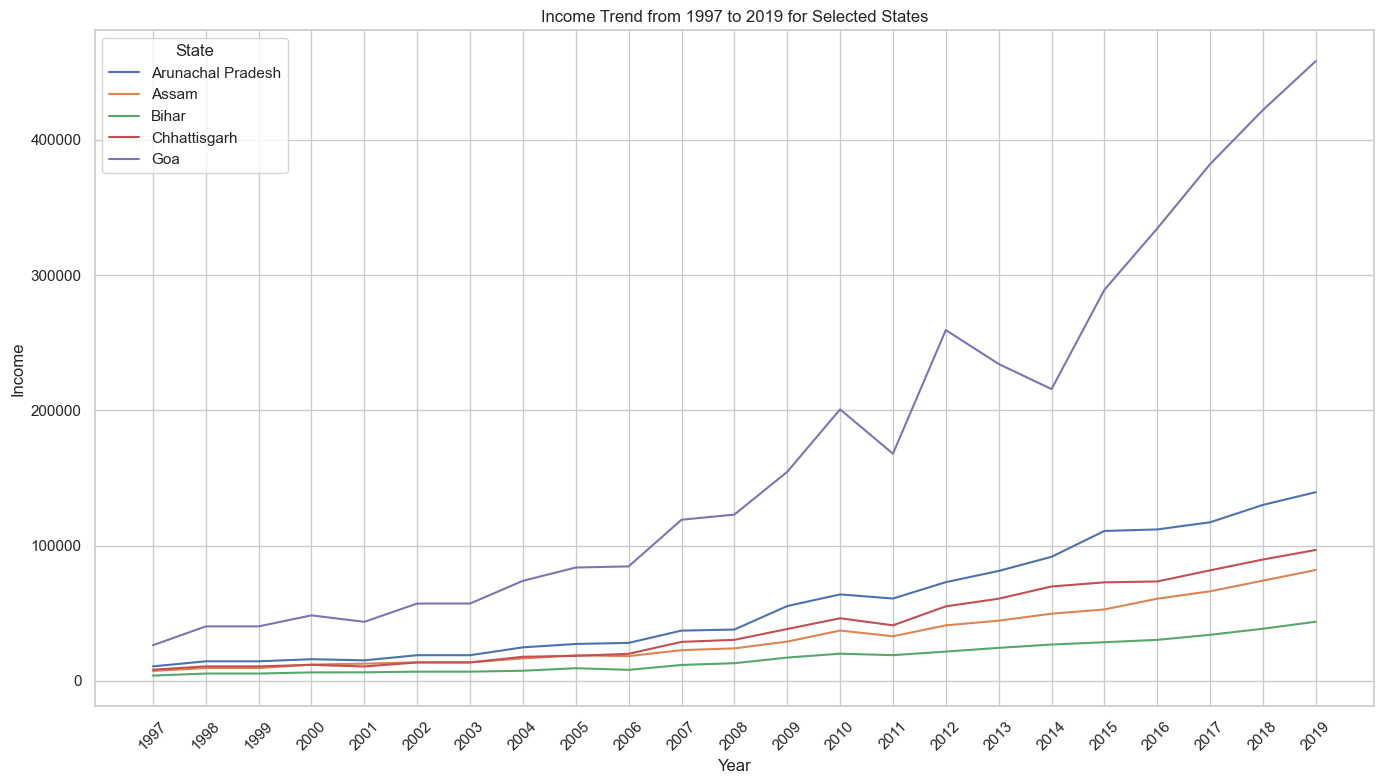

In [71]:

years = [str(year) for year in range(1997, 2020)] 
sample_states = df_new_data['State Name'].unique()[:5]
plt.figure(figsize=(14, 8))

for state in sample_states:
    state_data = df_new_data[df_new_data['State Name'] == state]
    years = [year for year in state_data.columns if year.isdigit()] 
    plt.plot(years, state_data[years].values.flatten(), label=state) 

plt.title('Income Trend from 1997 to 2019 for Selected States')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend(title='State')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()


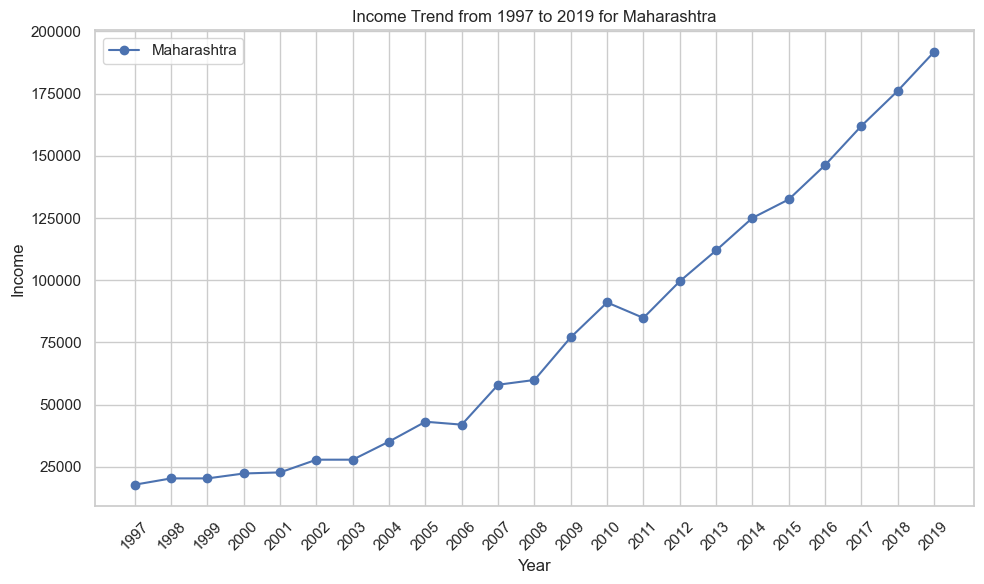

In [72]:
# Plotting income trend for Maharashtra specifically
maharashtra_data = df_new_data[df_new_data['State Name'] == 'Maharashtra']

# Extracting years for plotting
years_maharashtra = [year for year in maharashtra_data.columns if year.isdigit()]

plt.figure(figsize=(10, 6))
plt.plot(years_maharashtra, maharashtra_data[years_maharashtra].values.flatten(), label='Maharashtra', marker='o')

plt.title('Income Trend from 1997 to 2019 for Maharashtra')
plt.xlabel('Year')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# plotting maharastra life expectancy vs pm2.5

In [73]:
df = df.dropna()
df2 = df2.dropna()

In [74]:
df2_long = pd.melt(df2, id_vars=['dist_name', 'state_name_full'], var_name='Year', value_name='PM2.5')
df2_long['Year'] = df2_long['Year'].str.extract('(\d+)')  # Extracting year numbers as strings
df2_long.dropna(subset=['Year'], inplace=True)  # Dropping any rows where 'Year' might be NaN
df2_long['Year'] = df2_long['Year'].astype(int)  # Now safely converting to integer

# Aggregating PM2.5 data by state and year
pm25_state_yearly = df2_long.groupby(['state_name_full', 'Year']).agg({'PM2.5': 'mean'}).reset_index()

# RBI data: Convert to long format and handle year conversion
df_long = pd.melt(df, id_vars=['State / Union Teritory'], var_name='Year', value_name='Life Expectancy')
df_long['Year'] = df_long['Year'].astype(int)  # Assuming 'Year' column in RBI data has no NaNs and can convert directly

# Renaming columns for consistency
df_long.rename(columns={'State / Union Teritory': 'state_name_full'}, inplace=True)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\anees\AppData\Local\Temp\ipykernel_10284\4182502623.py:2: SyntaxWarning: invalid escape sequence '\d'
  df2_long['Year'] = df2_long['Year'].str.extract('(\d+)')  # Extracting year numbers as strings


In [75]:
# Merge the datasets on state and year
combined_data = pd.merge(pm25_state_yearly, df_long, on=['state_name_full', 'Year'], how='inner')


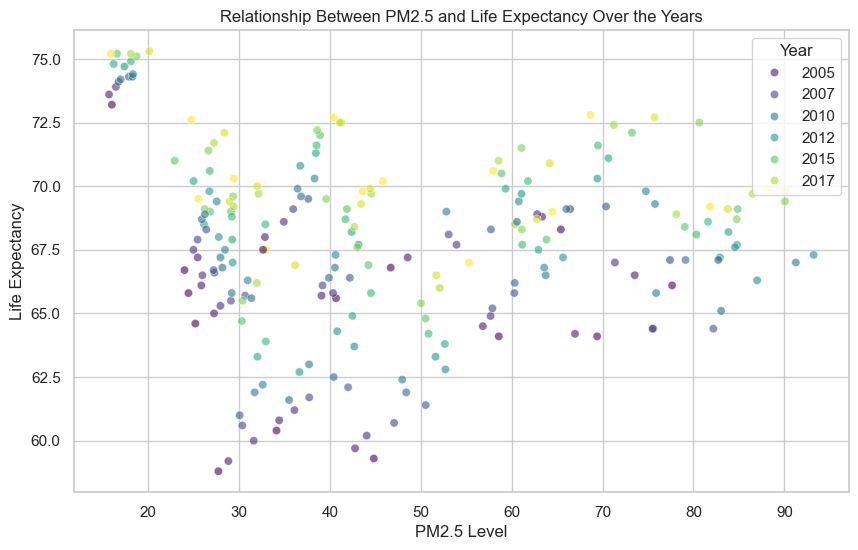

Correlation Matrix:
                     PM2.5  Life Expectancy
PM2.5            1.000000        -0.087749
Life Expectancy -0.087749         1.000000


In [76]:
# Correlation analysis
correlation = combined_data[['PM2.5', 'Life Expectancy']].corr()
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='PM2.5', y='Life Expectancy', hue='Year', palette='viridis', alpha=0.6)
plt.title('Relationship Between PM2.5 and Life Expectancy Over the Years')
plt.xlabel('PM2.5 Level')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.legend(title='Year', loc='upper right')
plt.show()
print("Correlation Matrix:\n", correlation)


In [77]:
combined_data.to_csv('combined_data.csv')

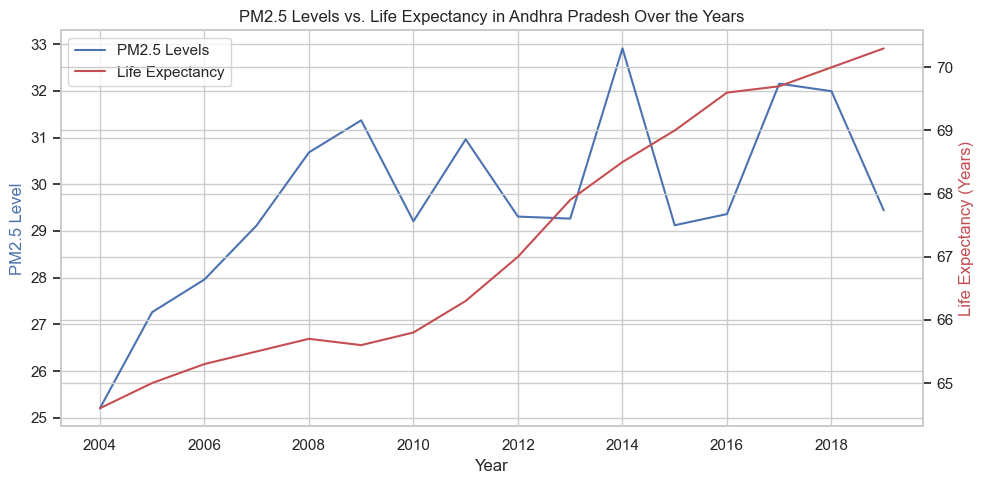

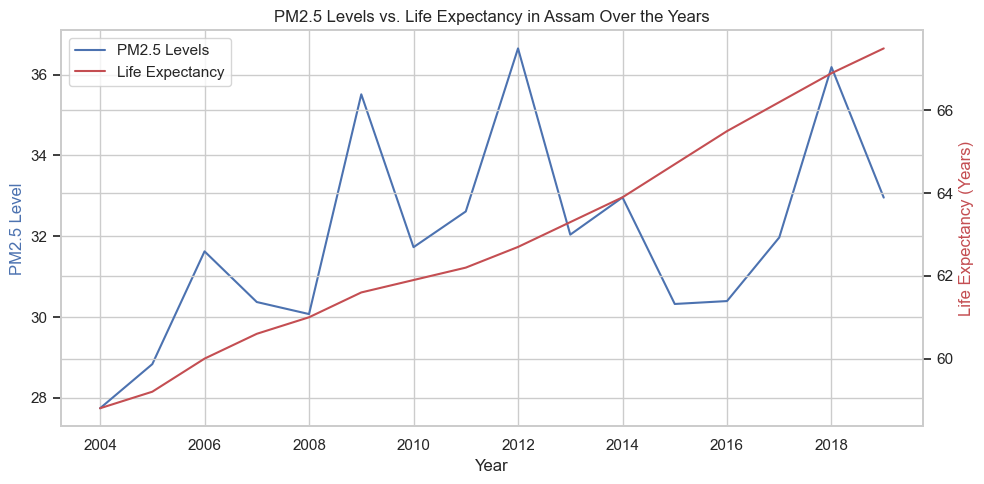

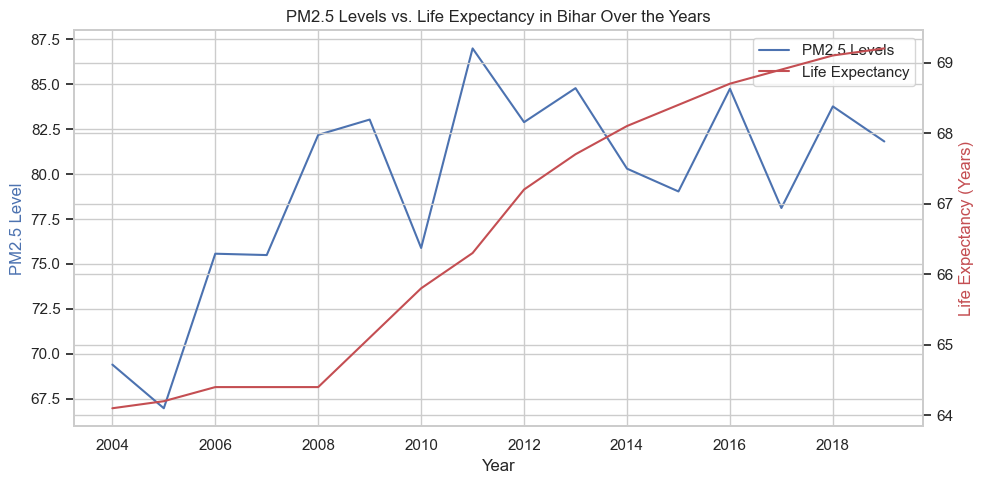

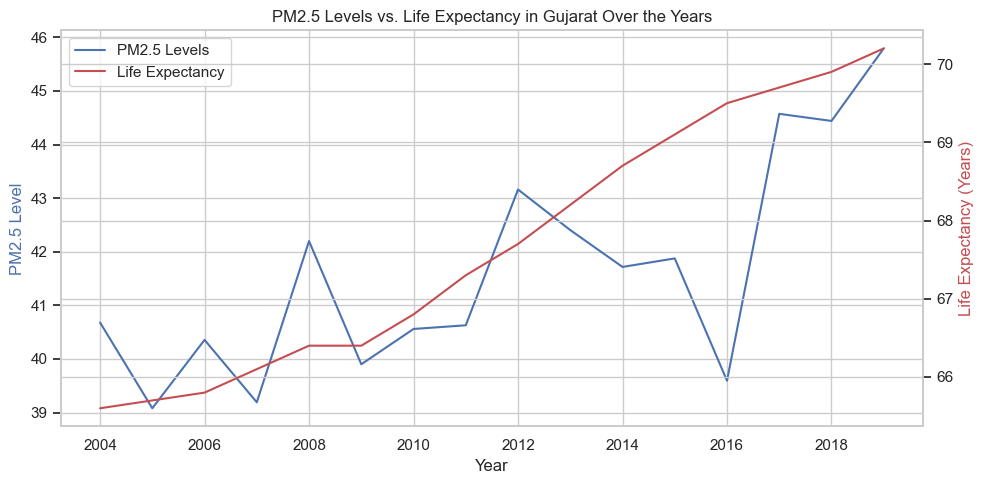

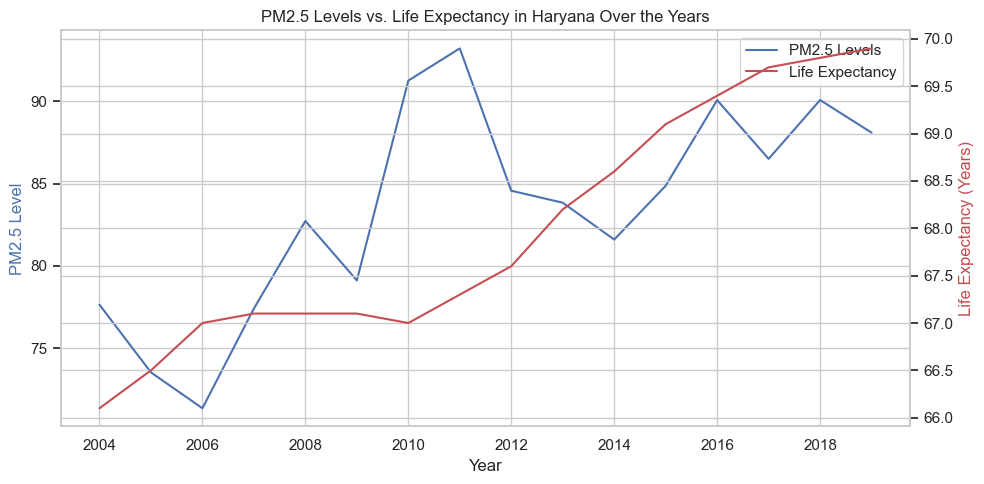

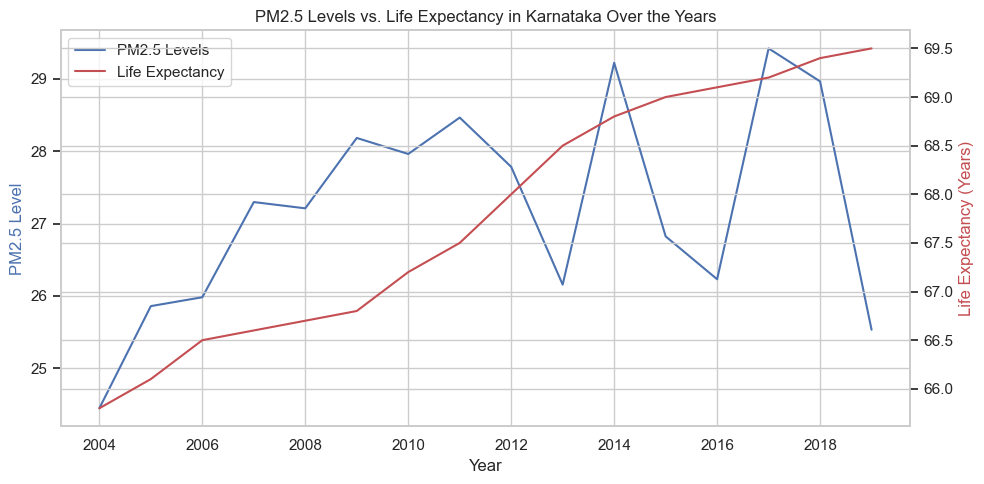

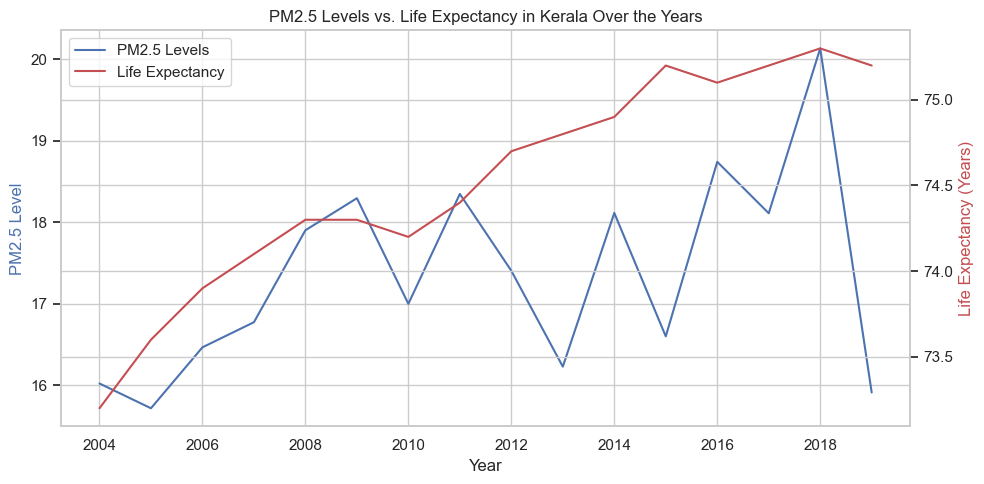

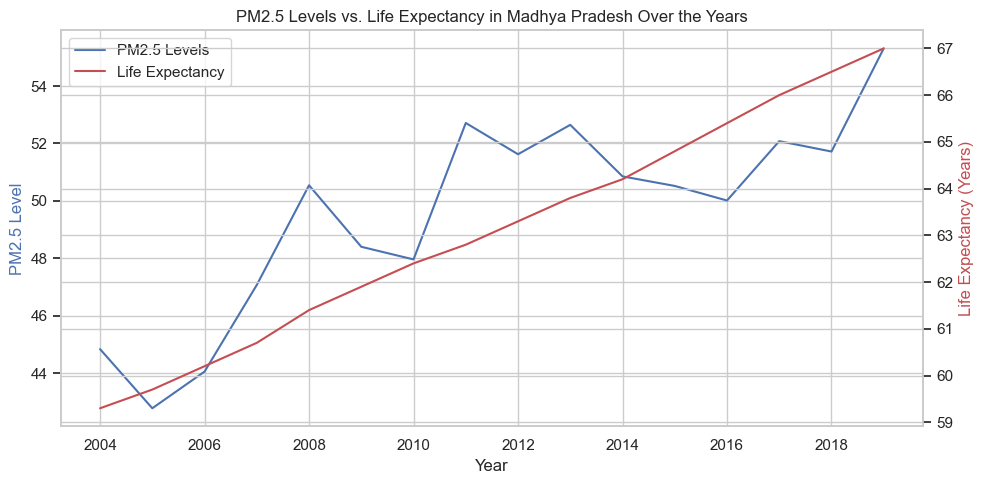

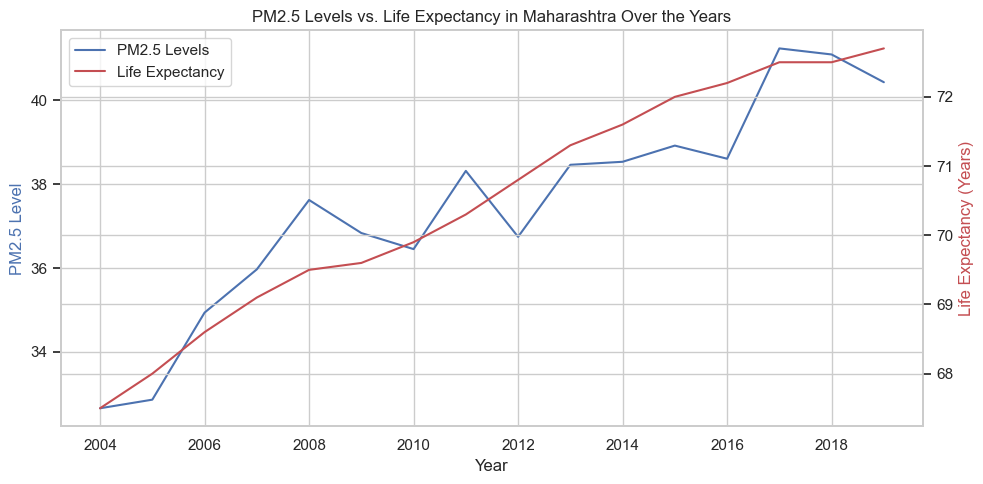

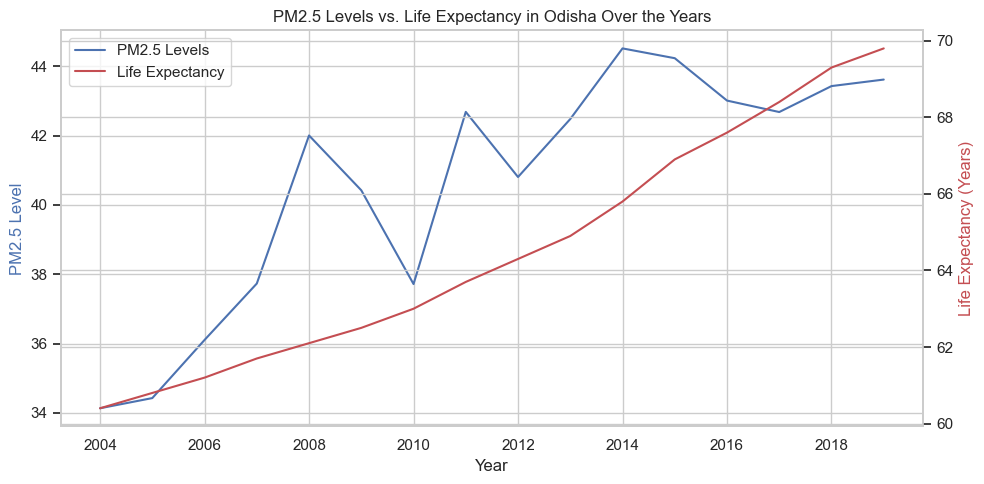

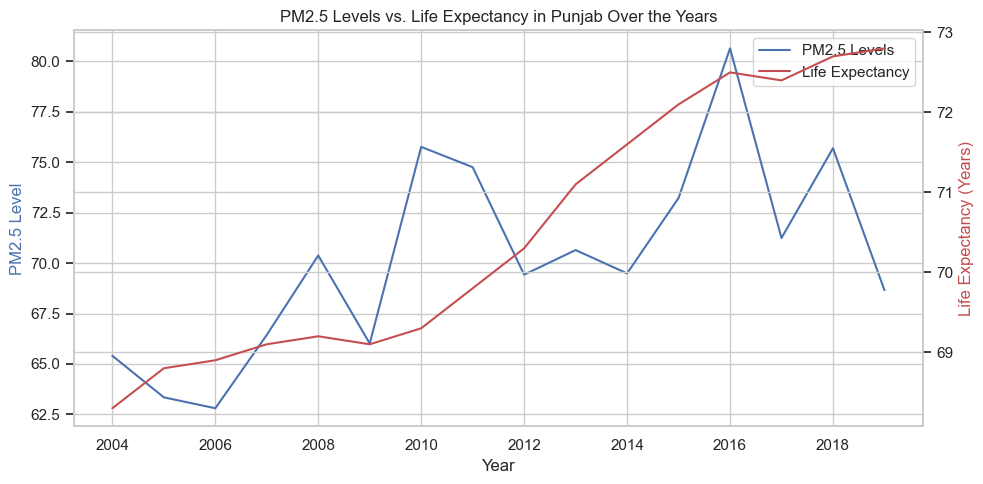

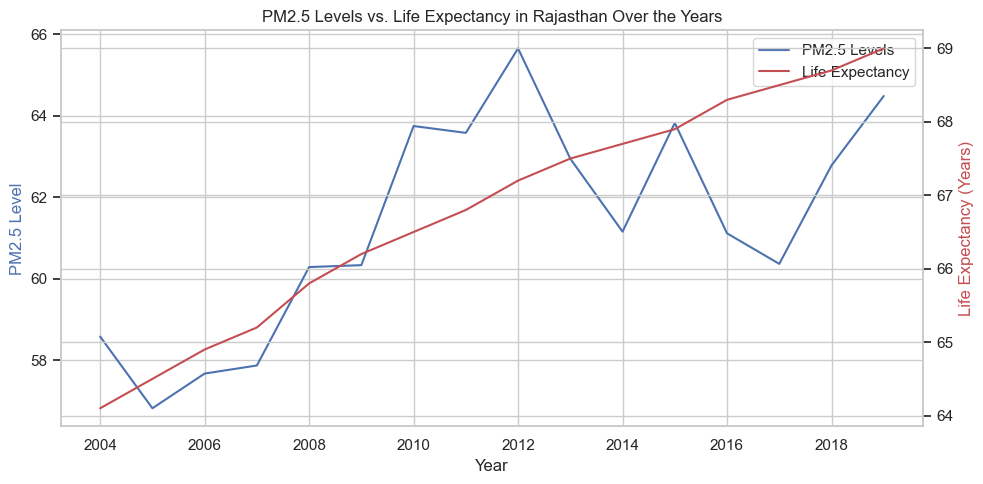

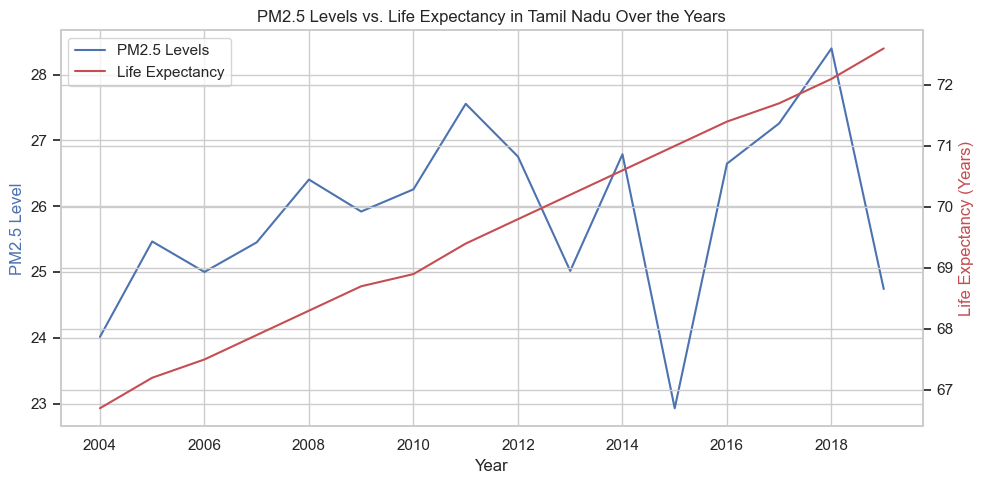

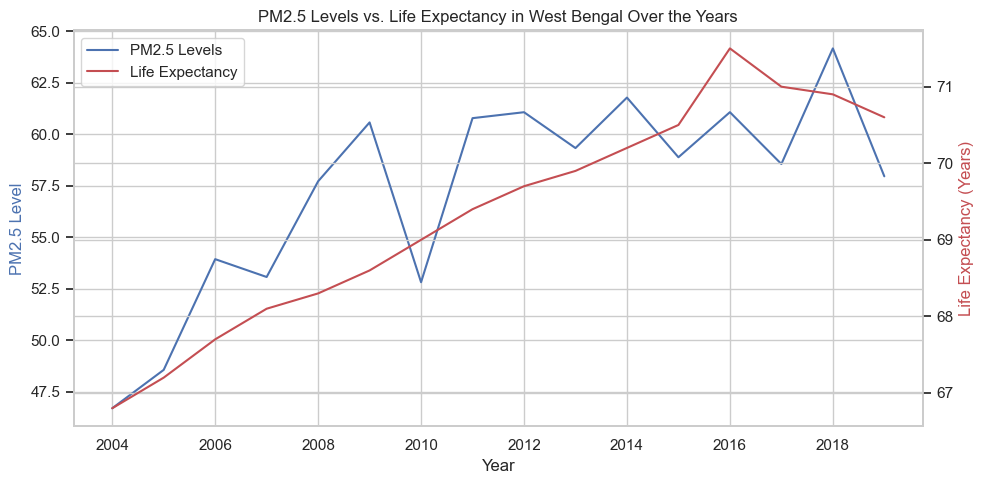

In [78]:
# First, we'll create a function that will plot a line graph for PM2.5 and life expectancy for a given state
def plot_state_data(state_name, dataframe):
    # Filter the dataset for the given state
    state_data = dataframe[dataframe['state_name_full'] == state_name]

    # Create a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Create a plot with a twin y-axis
    ax2 = ax1.twinx()

    # Plotting PM2.5 levels in blue on the left y-axis
    pm25_line, = ax1.plot(state_data['Year'], state_data['PM2.5'], 'b-', label='PM2.5 Levels')

    # Plotting life expectancy in red on the right y-axis
    life_exp_line, = ax2.plot(state_data['Year'], state_data['Life Expectancy'], 'r-', label='Life Expectancy')

    # Setting the x-axis label
    ax1.set_xlabel('Year')

    # Setting the y-axis labels
    ax1.set_ylabel('PM2.5 Level', color='b')
    ax2.set_ylabel('Life Expectancy (Years)', color='r')

    # Setting the title of the plot
    plt.title(f'PM2.5 Levels vs. Life Expectancy in {state_name} Over the Years')

    # Adding a legend for both line plots
    lines = [pm25_line, life_exp_line]
    ax1.legend(lines, [l.get_label() for l in lines])

    # Show the plot
    plt.tight_layout()
    plt.show()

# Now, we'll plot the line graph for each state
unique_states = combined_data['state_name_full'].unique()
for state in unique_states:
    plot_state_data(state, combined_data)


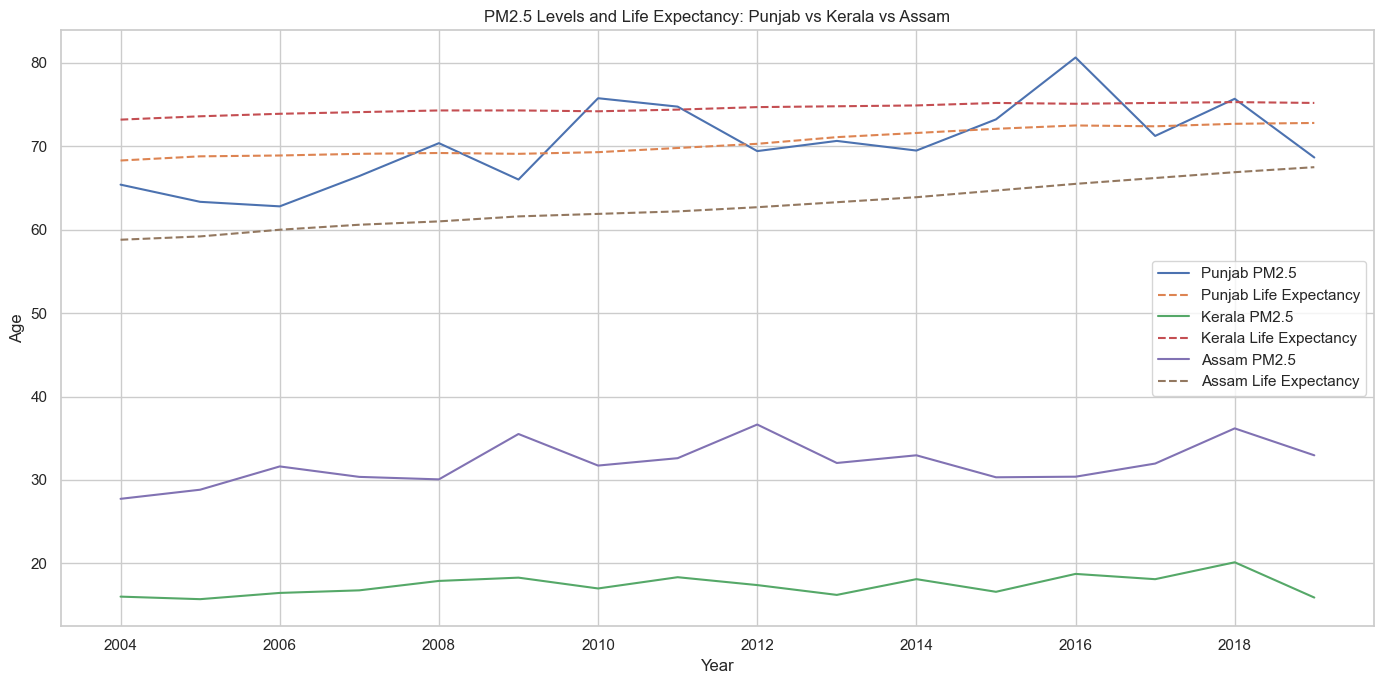

In [79]:
def plot_comparison(states, dataframe):
    plt.figure(figsize=(14, 7))
    for state in states:
        state_data = dataframe[dataframe['state_name_full'] == state]
        plt.plot(state_data['Year'], state_data['PM2.5'], label=f'{state} PM2.5')
        plt.plot(state_data['Year'], state_data['Life Expectancy'], linestyle='--', label=f'{state} Life Expectancy')
    plt.xlabel('Year')
    plt.ylabel('Age')
    plt.title('PM2.5 Levels and Life Expectancy: Punjab vs Kerala vs Assam')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
states_to_compare = ['Punjab', 'Kerala', 'Assam']
plot_comparison(states_to_compare, combined_data)


In [80]:
income_data = pd.read_csv('income_data.csv')
income_data.head()

,Unnamed: 0,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,State Name
0,0,10816,0,2800,9012,15260,21435,27646,33858,40069,...,60961,73068,81353,91809,110929,112046,117344,130197,139588,Arunachal Pradesh
1,1,7394,215,3533,6851,12803,13488,16806,20125,23443,...,33087,41142,44599,49734,52895,60817,66330,74184,82078,Assam
2,2,4001,7,1764,3522,6415,7038,8796,10554,12312,...,19111,21750,24487,26948,28671,30404,34156,38631,43822,Bihar
3,3,8353,0,3188,7446,10744,15964,20223,24481,28740,...,41165,55177,60849,69880,72936,73590,81808,89813,96887,Chhattisgarh
4,4,26418,0,0,16736,43735,55844,75398,94952,114506,...,168024,259444,234354,215776,289185,334575,382140,422155,458304,Goa


In [81]:
combined_data = pd.read_csv('income_data.csv')
combined_data.head()

,Unnamed: 0,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,State Name
0,0,10816,0,2800,9012,15260,21435,27646,33858,40069,...,60961,73068,81353,91809,110929,112046,117344,130197,139588,Arunachal Pradesh
1,1,7394,215,3533,6851,12803,13488,16806,20125,23443,...,33087,41142,44599,49734,52895,60817,66330,74184,82078,Assam
2,2,4001,7,1764,3522,6415,7038,8796,10554,12312,...,19111,21750,24487,26948,28671,30404,34156,38631,43822,Bihar
3,3,8353,0,3188,7446,10744,15964,20223,24481,28740,...,41165,55177,60849,69880,72936,73590,81808,89813,96887,Chhattisgarh
4,4,26418,0,0,16736,43735,55844,75398,94952,114506,...,168024,259444,234354,215776,289185,334575,382140,422155,458304,Goa


In [82]:
import pandas as pd

# Load datasets
income_data = pd.read_csv('income_data.csv')
combined_data = pd.read_csv('combined_data.csv')

income_long = pd.melt(income_data, id_vars='State Name', value_vars=[str(year) for year in range(1997, 2020)],
                      var_name='Year', value_name='Income')

# Ensure that the column names are consistent across datasets for merging
income_long.rename(columns={'State Name': 'state_name_full'}, inplace=True)
combined_data.rename(columns={'state_name_full': 'state_name_full'}, inplace=True)

# Convert 'Year' column to integer in both dataframes to ensure they merge correctly
income_long['Year'] = income_long['Year'].astype(int)
combined_data['Year'] = combined_data['Year'].astype(int)

# Merge the dataframes on 'state_name_full' and 'Year'
combined_full_data = pd.merge(combined_data, income_long, on=['state_name_full', 'Year'], how='left')

# Optional: Save the combined DataFrame to a new CSV file if you need to use it outside Python
output_path = 'path_to_save_combined_data.csv'  # Update this to where you want to save the combined data
combined_full_data.to_csv(output_path, index=False)

# Print the first few rows of the combined DataFrame to verify the results
print(combined_full_data.head())


   Unnamed: 0 state_name_full  Year      PM2.5  Life Expectancy  Income
0           0  Andhra Pradesh  2004  25.202646             64.6   32057
1           1  Andhra Pradesh  2005  27.262032             65.0   38328
2           2  Andhra Pradesh  2006  27.960725             65.3   28223
3           3  Andhra Pradesh  2007  29.120783             65.5   50870
4           4  Andhra Pradesh  2008  30.682722             65.7   57141


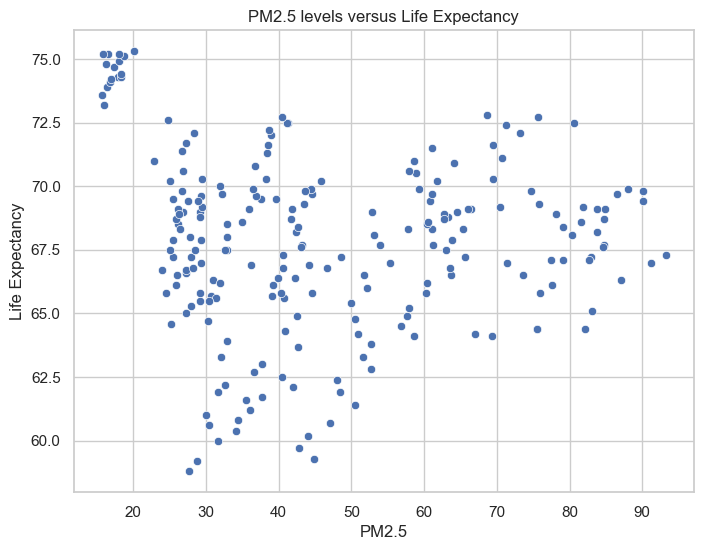

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_full_data, x='PM2.5', y='Life Expectancy')
plt.title('PM2.5 levels versus Life Expectancy')
plt.xlabel('PM2.5')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

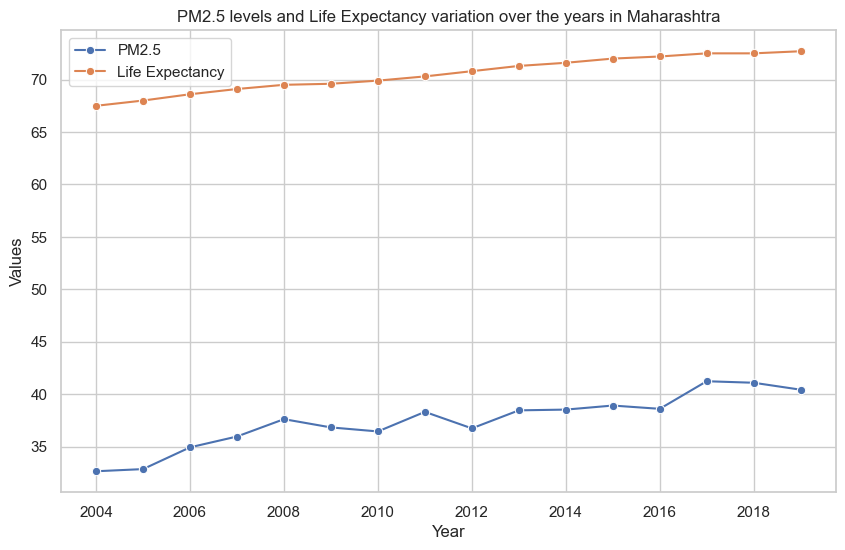

In [84]:
maharashtra_data = combined_full_data[combined_full_data['state_name_full'] == 'Maharashtra']

# Line plot of PM2.5 levels and Life Expectancy over the years for Maharashtra
plt.figure(figsize=(10, 6))
sns.lineplot(data=maharashtra_data, x='Year', y='PM2.5', marker='o', label='PM2.5')
sns.lineplot(data=maharashtra_data, x='Year', y='Life Expectancy', marker='o', label='Life Expectancy')
plt.title('PM2.5 levels and Life Expectancy variation over the years in Maharashtra')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()